In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint

from sklearn.metrics import confusion_matrix 

- MEDV : 주택가격(중앙값)
- CRIM : 범죄율
- ZN : 주거지 비율
- INDUS : 비소매업 비율
- CHAS : 강 조망 여부(1-조망,0-비조망)
- NOX : 산화질소 농도
- RM : 주거당 평균 객실 수
- AGE : 노후 건물 비율
- DIS : 중심지(노동센터) 접근 거리
- RAD : 고속도로 접근 편이성 지수
- TAX : 재산세율
- PTRATIO : 학생당 교사 비율
- B : 흑인 인구 비율
- LSTAT : 저소득층 비율

In [23]:
df_raw = pd.read_csv('/home/piai/test/과제/boston.csv',engine='python',encoding='CP949')

In [24]:
df_raw.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,2,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,1,1,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,1,1,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,1,1,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,1,1,18.700001,396.899994,5.33


In [25]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MEDV     493 non-null    float64
 1   CRIM     493 non-null    float64
 2   ZN       493 non-null    float64
 3   INDUS    493 non-null    float64
 4   CHAS     493 non-null    int64  
 5   NOX      493 non-null    float64
 6   RM       493 non-null    float64
 7   AGE      493 non-null    float64
 8   DIS      493 non-null    float64
 9   RAD      493 non-null    int64  
 10  TAX      493 non-null    int64  
 11  PTRATIO  493 non-null    float64
 12  B        493 non-null    float64
 13  LSTAT    493 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 54.0 KB


In [26]:
df_raw.CHAS = df_raw.CHAS.astype('object')
df_raw.RAD = df_raw.RAD.astype('object')
df_raw.TAX = df_raw.TAX.astype('object')

In [7]:
# sns.pairplot(df_raw)

In [27]:
#회귀모델 생성
reg_model=smf.ols(formula="MEDV ~ CRIM+ZN+INDUS+C(CHAS)+NOX+RM+AGE+DIS+C(RAD)+C(TAX)+PTRATIO+B+LSTAT", data=df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     77.05
Date:                Mon, 23 Nov 2020   Prob (F-statistic):          1.52e-124
Time:                        04:28:28   Log-Likelihood:                -1436.4
No. Observations:                 493   AIC:                             2909.
Df Residuals:                     475   BIC:                             2984.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       28.8089      5.248      5.489   

In [28]:
#다중공선성 확인
df_raw_x2 = df_raw.drop("MEDV",axis=1)[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS','PTRATIO', 'B', 'LSTAT']]
df_raw_x2_const = add_constant(df_raw_x2)
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x2_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x2_const.values, i)\
                 for i in range(df_raw_x2_const.shape[1])]
df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)

,variable,VIF
9,B,1.288
8,PTRATIO,1.394
1,CRIM,1.418
5,RM,1.761
2,ZN,2.138
10,LSTAT,2.832
6,AGE,3.039
3,INDUS,3.116
4,NOX,3.890
7,DIS,4.041


VIF>10인 변수가 없음

In [32]:
df_raw_x = df_raw.drop("MEDV",axis=1)
df_raw_y = df_raw["MEDV"]
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5).fit(df_raw_x,df_raw_y)
selected_cols = df_raw_x.columns[rfe.support_]
removed_cols = df_raw_x.columns[~rfe.support_]
print("Selected Variances: {}".format(selected_cols))
print("Removed Variances: {}".format(removed_cols))

Selected Variances: Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO'], dtype='object')
Removed Variances: Index(['CRIM', 'ZN', 'INDUS', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT'], dtype='object')


In [33]:
rfe_reg_model = smf.ols(formula='MEDV~CHAS+NOX+RM+DIS+PTRATIO',data=df_raw)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     147.2
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           5.63e-95
Time:                        04:29:49   Log-Likelihood:                -1535.7
No. Observations:                 493   AIC:                             3083.
Df Residuals:                     487   BIC:                             3109.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.5838      5.045      4.080      0.0

<AxesSubplot:>

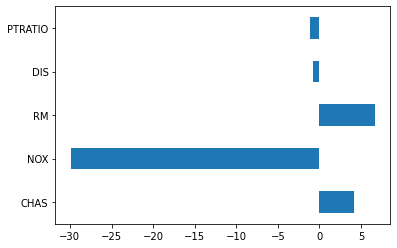

In [34]:
#비표준화 회귀계수를 통해 변수 중요도 확인
df_reg_coef = pd.DataFrame({"Coef":rfe_reg_result.params.values[1:]},index=selected_cols)
df_reg_coef.plot.barh(y="Coef",legend=False)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     147.2
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           5.63e-95
Time:                        04:29:51   Log-Likelihood:                -1535.7
No. Observations:                 493   AIC:                             3083.
Df Residuals:                     487   BIC:                             3109.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.2623      0.247     90.094      0.0

<AxesSubplot:>

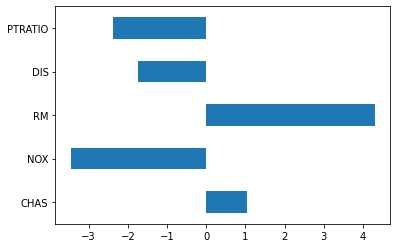

In [35]:
#표준화 회귀계수를 통해 변수 중요도 확인
scaler = StandardScaler()
cols=df_raw_x.columns
np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(np_scaled, columns=cols)
df_scaled["MEDV"] = df_raw["MEDV"]
reg_model_scaled = smf.ols(formula="MEDV~CHAS+NOX+RM+DIS+PTRATIO",data=df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

df_reg_coef = pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]}, index=selected_cols)
df_reg_coef.plot.barh(y= "Coef",legend=False)